In [9]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Installed Graphviz using Pip3

In [10]:
data_file_path = '/Users/roos/Data/all_trials_noNaN_CTET2.csv'
data_file = pd.read_csv(data_file_path)
data_ctet = data_file[['Age', 'Gender', 'MEQ_type', 'PSQI', 'results']]


In [11]:
#Encode categorical variables
#Gender
encoder = LabelEncoder()
label_encoder_gender = encoder.fit(data_ctet['Gender'])
print("gender classes:", label_encoder_gender.classes_)
integer_classes_gender = label_encoder_gender.transform(label_encoder_gender.classes_)
print("Gender integer classes", integer_classes_gender)
code = label_encoder_gender.transform(data_ctet['Gender'])
data_ctet['Gender'] = code

# MEQ_type
label_encoder_MEQ = encoder.fit(data_ctet['MEQ_type'])
print("MEQ classes:", label_encoder_MEQ.classes_)
integer_classes_MEQ = label_encoder_MEQ.transform(label_encoder_MEQ.classes_)
print("MEQ> integer classes", integer_classes_MEQ)
code_MEQ = label_encoder_MEQ.transform(data_ctet['MEQ_type'])
data_ctet['MEQ_type'] = code_MEQ

gender classes: ['female' 'male']
Gender integer classes [0 1]
MEQ classes: ['evening' 'intermediate' 'morning']
MEQ> integer classes [0 1 2]


In [12]:
# Splitting the data
X = data_ctet.drop('results', axis=1).values
Y = data_ctet['results'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X shape: (4050, 4)
Y shape: (4050,)


In [13]:
dt = DecisionTreeClassifier(max_depth=5, random_state=33)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=33)

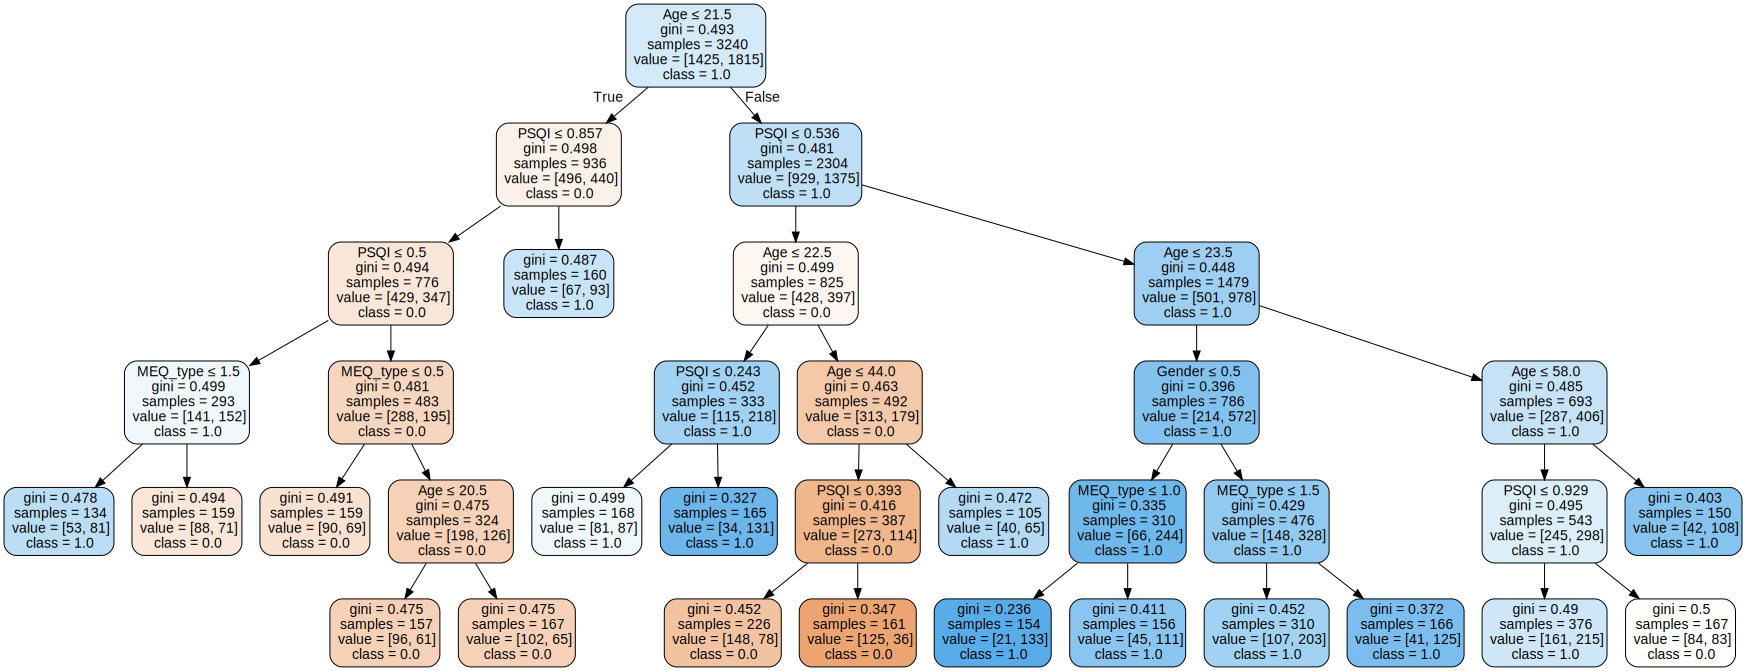

In [14]:
import graphviz

dot_data =  tree.export_graphviz(dt, out_file=None,
                                   feature_names=data_ctet.drop('results', axis=1).columns,
                                   class_names=['0.0', '1.0'],
                                   filled=True, rounded=True,
                                   special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render('model3.gv', view=True)
graph

In [15]:
# Building a forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, Y_train)
# prediction_test = random_forest.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))

# Building a forest
random_forest2 = RandomForestClassifier(n_estimators=100, random_state=33, max_depth=5)
random_forest2.fit(X_train, Y_train)

# Print hit rate
print("Hit rate train", Y_train.sum()/(len(Y_train)))
print("Hit rate test", Y_test.sum()/len(Y_test))
# Accuracy on Test
print("Optimised Training Accuracy is: ", random_forest2.score(X_train, Y_train))
# Accuracy on Train
print("Optimised Testing Accuracy is: ", random_forest2.score(X_test, Y_test))

Training Accuracy is:  0.6435185185185185
Testing Accuracy is:  0.6419753086419753
Hit rate train 0.5601851851851852
Hit rate test 0.5370370370370371
Optimised Training Accuracy is:  0.6432098765432098
Optimised Testing Accuracy is:  0.6444444444444445


In [16]:
fi2 = ''
final2 = ''
for i, column in enumerate(data_ctet.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest.feature_importances_[i]))
    fi2 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest.feature_importances_[i]]})
    try:
        final2 = pd.concat([final2, fi2], ignore_index=True)
    except:
        final2 = fi2

# Ordering the data
final_fi2 = final2.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi2

Importance of feature Age:, 0.415
Importance of feature Gender:, 0.036
Importance of feature MEQ_type:, 0.114
Importance of feature PSQI:, 0.435


,index,Variable,Feature Importance Score
0,3,PSQI,0.435239
1,0,Age,0.414965
2,2,MEQ_type,0.114079
3,1,Gender,0.035717


In [19]:
fi3 = ''
final3 = ''
for i, column in enumerate(data_ctet.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest2.feature_importances_[i]))
    fi3 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest2.feature_importances_[i]]})
    try:
        final3 = pd.concat([final3, fi3], ignore_index=True)
    except:
        final3 = fi3

# Ordering the data
final_fi3 = final3.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi3

Importance of feature Age:, 0.410
Importance of feature Gender:, 0.031
Importance of feature MEQ_type:, 0.136
Importance of feature PSQI:, 0.423


,index,Variable,Feature Importance Score
0,3,PSQI,0.422944
1,0,Age,0.410184
2,2,MEQ_type,0.136226
3,1,Gender,0.030646
